In [1]:
from utils import load_config, CdsERA5, WindSpeedVisualizer

In [2]:
config = load_config("config.yaml")
query = config["cds_request"]

In [3]:
cds = CdsERA5()
cds.get_data(query=query)
cds.download(filename="ERA5")
wind_speed, ds = cds.process()

2024-06-13 13:55:19.557 | INFO     | utils:__init__:127 - Successfully log to Climate Data Store
2024-06-13 13:55:19,681 INFO Welcome to the CDS
2024-06-13 13:55:19,681 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-06-13 13:55:19,791 INFO Request is completed
2024-06-13 13:55:19,792 INFO Downloading https://download-0018.copernicus-climate.eu/cache-compute-0018/cache/data6/adaptor.mars.internal-1718265084.5525434-5341-3-cbbe1e53-c2b5-40bc-babf-8785a487a7b3.grib to ERA5.grib (95.1M)
2024-06-13 13:55:22,468 INFO Download rate 35.5M/s  
Ignoring index file 'ERA5.grib.9093e.idx' older than GRIB file


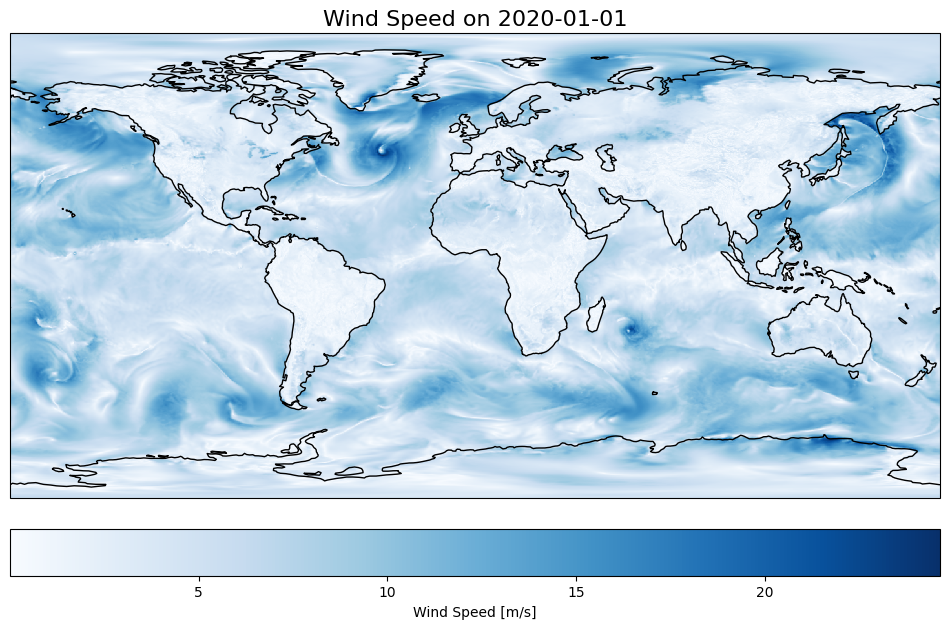

In [4]:
wind_anim = WindSpeedVisualizer.plot_wind_speed(wind_speed.sel(time=wind_speed.time[0]))

In [5]:
wind_anim = WindSpeedVisualizer.generate_animation(wind_speed)

In [6]:
wind_anim